<a href="https://colab.research.google.com/github/MaLuisa7/BusinessIntelligence_Class_master/blob/main/Pronostico_jerarquico_10x6_20231105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [89]:
from dateutil import relativedelta

# Function to convert the decimal representation to a datetime
def convert_decimal_to_datetime(decimal):
    year = int(decimal)
    month = int((decimal - year) * 12) + 1  # Adding 1 to make it a valid month (1-12)
    return f"{year}-{month:02d}-01"  # Format as "YYYY-MM-01"

In [90]:
path_cred_nobanc[9:-10]

'credito_nobancario'

In [91]:
path_cred = "/content/credito_fcast.csv"
path_cred_banc = "/content/credito_bancario_fcast.csv"
path_cred_nobanc = "/content/credito_nobancario_fcast.csv"

path_end = "/content/endeudamiento_fcast.csv"
path_end_banc ="/content/endeudamiento_bnacario_fcast.csv"
path_end_nobanc ="/content/endeudamiento_nobancario_fcast.csv"

path_viv = "/content/vivienda_fcast.csv"
path_viv_banc = "/content/vivienda_bancario_fcast.csv"
path_viv_nobanc = "/content/vivienda_nobancario_fcast.csv"

path_nacional = '/content/nacional_fcast.csv'

paths = [path_cred, path_cred_banc, path_cred_nobanc,
         path_end, path_end_banc, path_end_nobanc,
         path_viv, path_viv_banc, path_viv_nobanc,
         path_nacional]
names = ['credito', 'credito_bancario', 'credito_nobancario',
         'endeudamiento', 'endeudamiento_bancario', 'endeudamiento_nobancario',
         'vivienda', 'vivienda_bancario', 'vivienda_nobancario',
         'nacional']

In [92]:
data_lst = []
str_names = ''
for ruta in paths:
  dfn = pd.read_csv(ruta)
  dfn['nombre'] = ruta[9:-10]
  str_names += ruta[9:-10]
  dfn['tipo'] = ['obs']*118 + ['fcast']*30
  # Apply the conversion function to the entire column
  dfn['date_column'] = dfn['Time'].apply(convert_decimal_to_datetime)

  # Convert the resulting strings to datetime objects
  dfn['date_column'] = pd.to_datetime(dfn['date_column'])

  data_lst.append(dfn)
  print(dfn.shape)
  display(dfn.head(1))

(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,credito,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,credito_bancario,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,credito_nobancario,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,endeudamiento,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,endeudamiento_bnacario,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,endeudamiento_nobancario,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,vivienda,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,vivienda_bancario,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,vivienda_nobancario,obs,1995-01-01


(148, 5)


,Time,Value,nombre,tipo,date_column
0,1995.0,0.0,nacional,obs,1995-01-01


In [93]:
data = pd.concat(data_lst, axis =0).reset_index(drop=True)
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(1480, 5)


,Time,Value,nombre,tipo,date_column
0,1995.000000,0.0,credito,obs,1995-01-01
1,1995.333333,0.0,credito,obs,1995-04-01
2,1995.666667,0.0,credito,obs,1995-09-01
3,1996.000000,51133.0,credito,obs,1996-01-01
4,1996.333333,0.0,credito,obs,1996-04-01


In [94]:
str_names

'creditocredito_bancariocredito_nobancarioendeudamientoendeudamiento_bnacarioendeudamiento_nobancarioviviendavivienda_bancariovivienda_nobancarionacional'

In [95]:
df = pd.DataFrame()
df1 = pd.DataFrame()
lst_names = ['credito','credito_bancario','credito_nobancario',
             'endeudamiento','endeudamiento_bnacario','endeudamiento_nobancario',
             'vivienda','vivienda_bancario','vivienda_nobancario',
             'nacional']
n = 0
df = data.query("nombre == @lst_names[0]").loc[:,['date_column', 'tipo']]
df1['date_column'] = df.date_column.reset_index(drop=True)
df1['tipo'] = df.tipo.reset_index(drop=True)

for n in range(0, len(lst_names)):
  df2 = data.query("nombre == @lst_names[@n]").loc[:,['nombre', 'Value']].reset_index(drop=True)
  df1[lst_names[n]] = df2.Value.values
  df1

In [96]:
df1

,date_column,tipo,credito,credito_bancario,credito_nobancario,endeudamiento,endeudamiento_bnacario,endeudamiento_nobancario,vivienda,vivienda_bancario,vivienda_nobancario,nacional
0,1995-01-01,obs,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1995-04-01,obs,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1995-09-01,obs,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1996-01-01,obs,5.113300e+04,4.833550e+04,2797.500000,8.053791e+05,4.579557e+05,3.474234e+05,1.414949e+05,1.030938e+05,3.840110e+04,9.980070e+05
4,1996-04-01,obs,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
143,2042-09-01,fcast,3.394674e+06,2.797181e+06,341956.844026,1.168208e+07,4.221161e+06,7.550716e+06,4.649135e+06,1.960098e+06,2.687293e+06,1.776348e+07
144,2043-01-01,fcast,3.457954e+06,2.847829e+06,346262.174064,1.176393e+07,4.250323e+06,7.603767e+06,4.700524e+06,1.984824e+06,2.711744e+06,1.788792e+07
145,2043-04-01,fcast,3.520972e+06,2.905438e+06,350816.248557,1.184578e+07,4.279091e+06,7.656819e+06,4.749575e+06,2.009550e+06,2.736195e+06,1.801237e+07
146,2043-09-01,fcast,3.589788e+06,2.956189e+06,355516.504347,1.192763e+07,4.308156e+06,7.709870e+06,4.800018e+06,2.034275e+06,2.760647e+06,1.813681e+07


In [97]:
s = np.matrix([[1,1, 1,1, 1,1], #nacional
               [1,1, 0,0, 0,0], #credito
               [0,0, 1,1, 0,0], #endeudamiento
               [0,0, 0,0, 1,1], #vivienda
               [1,0, 0,0, 0,0], #cred bancario
               [0,1, 0,0, 0,0], #cred nobanc
               [0,0, 1,0, 0,0], #endeu banc
               [0,0, 0,1, 0,0], #endeu nobanc
               [0,0, 0,0, 1,0], #viv banc
               [0,0, 0,0, 0,1]  #viv noban
               ])
print(s.shape)
print(s)

(10, 6)
[[1 1 1 1 1 1]
 [1 1 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 1 1]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


In [98]:
# y_tilde = S(S' S)^(-1) S' y_gorro
s1 =  s * np.linalg.inv(s.T * s) * s.T
print(s1.shape)
print(s1)

(10, 10)
[[ 0.66666667  0.22222222  0.22222222  0.22222222  0.11111111  0.11111111
   0.11111111  0.11111111  0.11111111  0.11111111]
 [ 0.22222222  0.51851852 -0.14814815 -0.14814815  0.25925926  0.25925926
  -0.07407407 -0.07407407 -0.07407407 -0.07407407]
 [ 0.22222222 -0.14814815  0.51851852 -0.14814815 -0.07407407 -0.07407407
   0.25925926  0.25925926 -0.07407407 -0.07407407]
 [ 0.22222222 -0.14814815 -0.14814815  0.51851852 -0.07407407 -0.07407407
  -0.07407407 -0.07407407  0.25925926  0.25925926]
 [ 0.11111111  0.25925926 -0.07407407 -0.07407407  0.62962963 -0.37037037
  -0.03703704 -0.03703704 -0.03703704 -0.03703704]
 [ 0.11111111  0.25925926 -0.07407407 -0.07407407 -0.37037037  0.62962963
  -0.03703704 -0.03703704 -0.03703704 -0.03703704]
 [ 0.11111111 -0.07407407  0.25925926 -0.07407407 -0.03703704 -0.03703704
   0.62962963 -0.37037037 -0.03703704 -0.03703704]
 [ 0.11111111 -0.07407407  0.25925926 -0.07407407 -0.03703704 -0.03703704
  -0.37037037  0.62962963 -0.03703704 -0.0

In [99]:

df1.head()

,date_column,tipo,credito,credito_bancario,credito_nobancario,endeudamiento,endeudamiento_bnacario,endeudamiento_nobancario,vivienda,vivienda_bancario,vivienda_nobancario,nacional
0,1995-01-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1995-04-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995-09-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996-01-01,obs,51133.0,48335.5,2797.5,805379.1,457955.7,347423.4,141494.9,103093.8,38401.1,998007.0
4,1996-04-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
df1.columns

Index(['date_column', 'tipo', 'credito', 'credito_bancario',
       'credito_nobancario', 'endeudamiento', 'endeudamiento_bnacario',
       'endeudamiento_nobancario', 'vivienda', 'vivienda_bancario',
       'vivienda_nobancario', 'nacional'],
      dtype='object')

In [101]:
niveles  = ['nacional','credito', 'endeudamiento', 'vivienda',
            'credito_bancario',  'credito_nobancario',
            'endeudamiento_bnacario', 'endeudamiento_nobancario',
            'vivienda_bancario',  'vivienda_nobancario']

query1 = "tipo == 'fcast'"
query2 = "tipo == 'obs'"

In [102]:

# def pronostico_jerarquico(df_x, niveles_mas_bajos,s1):
df_x = df1.copy()
df_fcast = df_x.query(query1)
df_fcast_values = df_fcast.loc[:, niveles]
df_obs = df_x.query(query2)

y_tilde = (s1*df_fcast_values.values.T).T
df_jerarquico  = pd.DataFrame(y_tilde, columns = niveles)
df_jerarquico['date_column'] = df_fcast.loc[:, ['date_column']].values
df_jerarquico['tipo'] = df_fcast.loc[:, ['tipo']].values

df_final = pd.concat([df_obs, df_jerarquico], axis =0).reset_index(drop=True)
df_final.replace({'fcast': "fcast_jerarquico"}, inplace=True  )
# return df_final


In [110]:
pronostico_jerarquico = df_final.copy()
pronostico_jerarquico.head()

,date_column,tipo,credito,credito_bancario,credito_nobancario,endeudamiento,endeudamiento_bnacario,endeudamiento_nobancario,vivienda,vivienda_bancario,vivienda_nobancario,nacional
0,1995-01-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1995-04-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995-09-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996-01-01,obs,51133.0,48335.5,2797.5,805379.1,457955.7,347423.4,141494.9,103093.8,38401.1,998007.0
4,1996-04-01,obs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


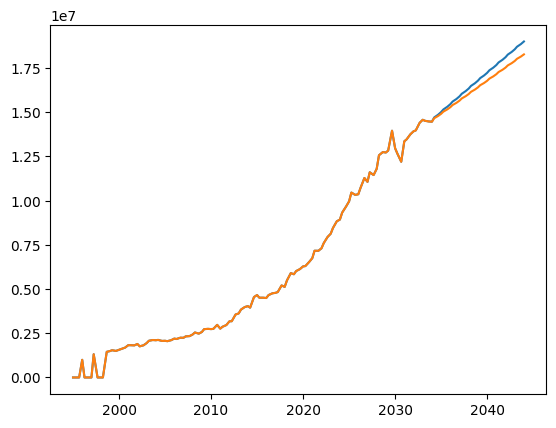

In [109]:
y1 = pronostico_jerarquico.nacional.values
y2 =  df1.nacional.values
x1 = df1.date_column
plt.plot(x1, y1)
plt.plot(x1,y2)


In [114]:
niveles1 = [ #'credito', 'endeudamiento', 'vivienda',
            'credito_bancario',  'credito_nobancario',
            'endeudamiento_bnacario', 'endeudamiento_nobancario',
            'vivienda_bancario',  'vivienda_nobancario']
niveles1

['credito_bancario',
 'credito_nobancario',
 'endeudamiento_bnacario',
 'endeudamiento_nobancario',
 'vivienda_bancario',
 'vivienda_nobancario']

In [115]:
(pronostico_jerarquico.loc[:, niveles1].sum() / pronostico_jerarquico.loc[:, ['nacional']].sum().values).sum()

0.9999999999999998

In [116]:
(df1.loc[:, niveles1].sum() / df1.loc[:, ['nacional']].sum().values).sum()

1.0293762945101383